In [29]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

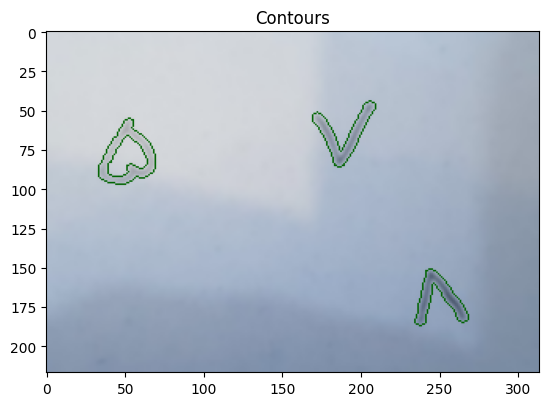

In [30]:
image = cv.imread(r"D:\Opencv\adad.jpg")
image = cv.GaussianBlur(image, (7,7), 0)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
binary_image = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 6)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5), (2,2))
dilate = cv.dilate(binary_image, kernel, iterations=1)

contours, hierarchy = cv.findContours(dilate, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
all_contours = cv.drawContours(image.copy(), contours, -1, (0,100,0), 1)


plt.figure(figsize=[14,8])

plt.subplot(122);plt.imshow(all_contours);plt.title("Contours");


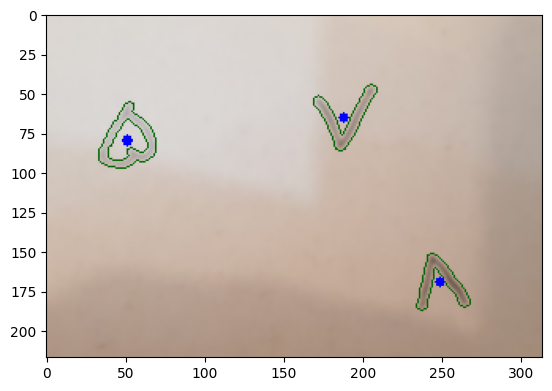

In [31]:
for c in contours:
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(all_contours, (cx,cy), 3, (255,0,0), -1)
    
plt.imshow(all_contours[...,::-1])

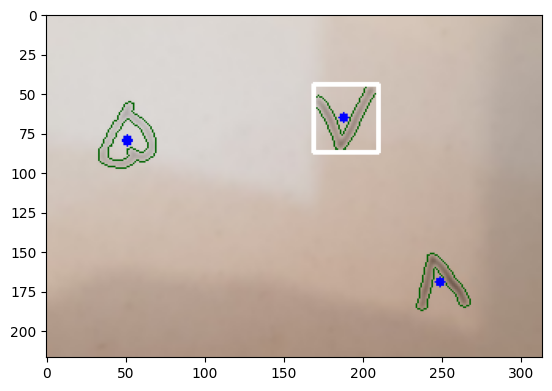

In [32]:
bound = cv.boundingRect(contours[3])
cv.rectangle(all_contours, (int(bound[0]), int(bound[1])),  (int(bound[0] + bound[2]), int(bound[1]+bound[3])), (255,255,255), 2)

plt.imshow(all_contours[...,::-1])

In [33]:
cv.imwrite('all_contours.jpg', all_contours)

True